In [ ]:
# Plot scalability

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import plotnine
from plotnine import \
    ggplot, aes, theme, themes, element_blank, element_line, element_text, mapping, \
    geom_point, geom_jitter, geom_line, geom_bar, geom_boxplot, geom_violin, geom_histogram, \
    ggtitle, xlab, ylab, geom_vline, geom_hline, \
    scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, \
    scale_color_discrete, scale_color_manual, scale_fill_manual, \
    xlim, ylim
from plotnine.options import figure_size

# https://github.com/ponnhide/patchworklib
import patchworklib as pw



<Figure size 72x72 with 0 Axes>

In [3]:
import plotnine as p9
p9.__version__ = '0.9.0'

In [4]:
# plotnine theme

def theme_tufte_func(base_size=19, base_family="sans", rotate=True, figure_size=None):
    ''' Plotnine plotting theme. '''
    thm = themes.theme_bw(base_size=base_size, base_family = base_family) + \
        theme(
            legend_background = element_blank(),
            legend_key = element_blank(),
            panel_background = element_blank(),
            panel_border = element_blank(),
            strip_background = element_blank(),
            plot_background = element_blank(),
            panel_grid = element_blank(),
            axis_line = element_line(colour = "black", size = 1),
            axis_text_y = element_text(colour = "black")
        )

    if rotate:
        thm += theme(axis_text_x=element_text(rotation=45, hjust=1))
    if figure_size is not None:
        thm += theme(figure_size=figure_size)

    return thm



## HPRC scalability
| num. genomes | MEMO plain | MEMO order overlap | KMC conservation | PanKmer |
|--------------|------------|--------------------|------------------|---------|
| 5            | 580        | 520                | 15288            | 14214   |
| 9            | 912        | 812                | 15288            | 14834   |
| 17           | 1510       | 1177               | 15996            | 15739   |
| 33           | 3179       | 2197               | 16861            | 17747   |
| 65           | 5302       | 3152               | 17687            | 20962   |
| 94           | 7524       | 4018               | 18288            | 23939   |

## VGP scalability
| num. genomes | MEMO plain | MEMO order overlap | KMC conservation | PanKmer |
|--------------|------------|--------------------|------------------|---------|
| 4            | 1720       | 1843               | 33028            | 30212  |
| 8            | 3686       | 3982               | 56562            | 53794  |
| 12           | 5562       | 5161               | 91775            | 89730  |
| 16           | 7354       | 6304               | 123804           | 120711 |


In [5]:
VGP_raw = [[4, 1720, 1843, 33028, 30212],
[8, 3686, 3982, 56562, 53794],
[12, 5562, 5161, 91775, 89730],
[16, 7354, 6304, 123804, 120711]]

In [6]:
 HPRC_raw = [[5, 580, 520, 15288, 14214],
 [9, 912, 812, 15288, 14834],
 [17, 1510, 1177, 15996, 15739],
 [33, 3179, 2197, 16861, 17747],
 [65, 5302, 3152, 17687, 20962],
 [94, 7524, 4018, 18288, 23939]]

In [ ]:
HPRC_raw = [
[5, 580, 520, 15288, 14214],
[9, 912, 812, 15288, 14834],
[17, 1510, 1177, 15996, 15739],
[33, 3179, 2197, 16861, 17747],
[65, 5302, 3152, 17687, 20962],
[94, 7524, 4018, 18288, 23939]
]

In [7]:
HPRC_raw = [[9, 0.34, 0.33, 15.41, 128.19, 14.57],
[18, 0.59, 0.59, 15.85, 256.32, 15.58],
[27, 0.80, 0.81, 16.22, 384.43, 16.54],
[36, 0.95, 0.97, 16.48, 512.59, 17.39],
[45, 1.13, 1.16, 16.79, 655.00, 18.36],
[54, 1.31, 1.36, 17.11, 768.90, 19.36],
[63, 1.51, 1.57, 17.43, 897.09, 20.40],
[72, 1.74, 1.94, 17.68, 1025.18, 21.22],
[81, 1.90, 2.14, 17.88, 1153.34, 22.44],
[89, 2.04, 2.35, 18.05, 1267.20, 23.29]]

col_names = ['Number Genomes', 'MEMO: Conservation', 'MEMO: Membership', 'KMC3: Conservation', 'KMC3: Membership', 'PanKmer'] 
HPRC_df = pd.DataFrame(HPRC_raw, columns=col_names)
HPRC_df

,Number Genomes,MEMO: Conservation,MEMO: Membership,KMC3: Conservation,KMC3: Membership,PanKmer
0,9,0.34,0.33,15.41,128.19,14.57
1,18,0.59,0.59,15.85,256.32,15.58
2,27,0.80,0.81,16.22,384.43,16.54
3,36,0.95,0.97,16.48,512.59,17.39
4,45,1.13,1.16,16.79,655.00,18.36
5,54,1.31,1.36,17.11,768.90,19.36
6,63,1.51,1.57,17.43,897.09,20.40
7,72,1.74,1.94,17.68,1025.18,21.22
8,81,1.90,2.14,17.88,1153.34,22.44
9,89,2.04,2.35,18.05,1267.20,23.29


In [8]:
HPRC_melt = pd.melt(HPRC_df, id_vars=col_names[0], value_vars=col_names[1:], var_name='Index type')
HPRC_melt

,Number Genomes,Index type,value
0,9,MEMO: Conservation,0.34
1,18,MEMO: Conservation,0.59
2,27,MEMO: Conservation,0.80
3,36,MEMO: Conservation,0.95
4,45,MEMO: Conservation,1.13
5,54,MEMO: Conservation,1.31
6,63,MEMO: Conservation,1.51
7,72,MEMO: Conservation,1.74
8,81,MEMO: Conservation,1.90
9,89,MEMO: Conservation,2.04


In [13]:
HPRC_melt_2 = HPRC_melt[HPRC_melt['Index type'] != "MEMO: Membership"]
HPRC_melt_2 = HPRC_melt_2[HPRC_melt_2['Index type'] != "KMC3: Membership"]
HPRC_melt_subset = HPRC_melt_2

In [24]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
color_dict = dict(zip(['MEMO: Conservation', 'KMC3: Conservation', 'PanKmer'] , colors))



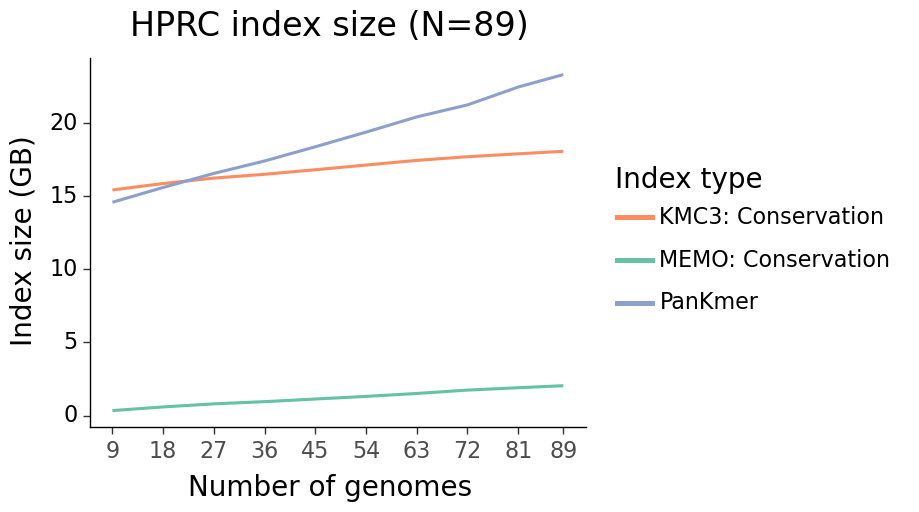

<ggplot: (8783866342141)>

In [26]:
(
    ggplot(HPRC_melt_subset, aes(x='Number Genomes', y='value', color='Index type')) +
    #ggplot(HPRC_melt, aes(x='Number Genomes', y='value', color='Index type')) +
    geom_line(size=1.25) +
    ggtitle("HPRC index size (N=89)") +
    xlab("Number of genomes") +
    ylab("Index size (GB)") +
    scale_color_manual(color_dict) +
    scale_x_continuous(breaks=list(HPRC_df['Number Genomes'])) +
    theme_tufte_func(base_size=20, rotate=False)
)

In [7]:
#col_names = ['Number Genomes', 'MEMO: Plain', 'MEMO: Order Overlap', 'KMC', 'PanKmer'] 
col_names = ['Number Genomes', 'MEMO: Plain', 'MEMO', 'KMC', 'PanKmer'] 
HPRC_df = pd.DataFrame(HPRC_raw, columns=col_names)
VGP_df =  pd.DataFrame(VGP_raw, columns=col_names)

In [8]:
HPRC_melt = pd.melt(HPRC_df, id_vars=col_names[0], value_vars=col_names[1:], var_name='Index type')
VGP_melt = pd.melt(VGP_df, id_vars=col_names[0], value_vars=col_names[1:], var_name='Index type')

HPRC_melt_subset = HPRC_melt[HPRC_melt['Index type'] != "MEMO: Plain"]
VGP_melt_subset = VGP_melt[VGP_melt['Index type'] != "MEMO: Plain"]

VGP_melt_subset['value'] = VGP_melt_subset['value'] * 0.00104858
HPRC_melt_subset['value'] = HPRC_melt_subset['value'] * 0.00104858

In [9]:
HPRC_melt_subset

,Number Genomes,Index type,value
6,5,MEMO,0.545262
7,9,MEMO,0.851447
8,17,MEMO,1.234179
9,33,MEMO,2.303730
10,65,MEMO,3.305124
11,94,MEMO,4.213194
12,5,KMC,16.030691
13,9,KMC,16.030691
14,17,KMC,16.773086
15,33,KMC,17.680107


In [10]:
VGP_melt_subset

,Number Genomes,Index type,value
4,4,MEMO,1.932533
5,8,MEMO,4.175446
6,12,MEMO,5.411721
7,16,MEMO,6.610248
8,4,KMC,34.632500
9,8,KMC,59.309782
10,12,KMC,96.233429
11,16,KMC,129.818398
12,4,PanKmer,31.679699
13,8,PanKmer,56.407313


In [12]:

#classes = ['MEMO_order_overlap', 'KMC_conservation', 'PanKmer', 'MEMO_plain']
#colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
#colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
colors = ['#e78ac3', '#66c2a5', '#fc8d62', '#8da0cb']
color_dict = dict(zip(col_names[1:], colors))



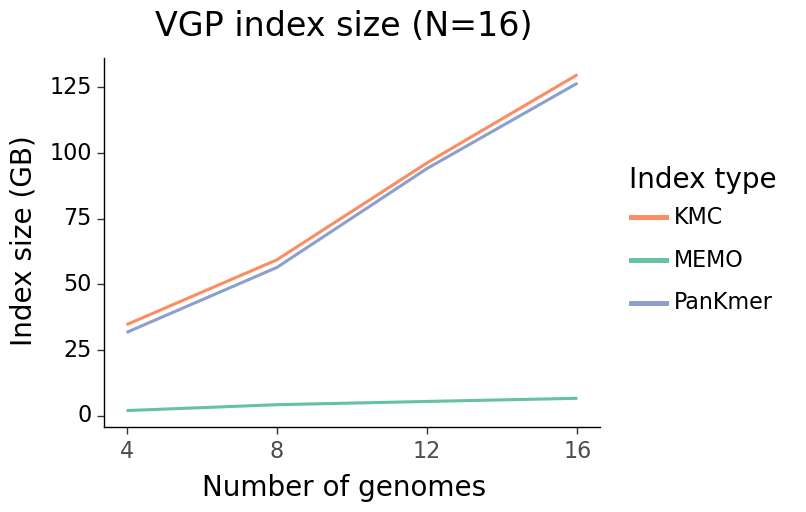

<ggplot: (8738926967676)>

In [19]:
(
    ggplot(VGP_melt_subset, aes(x='Number Genomes', y='value', color='Index type')) +
    geom_line(size=1.25) +
    ggtitle("VGP index size (N=16)") +
    xlab("Number of genomes") +
    ylab("Index size (GB)") +
    scale_color_manual(color_dict) +
    scale_y_continuous(breaks=range(0, 150, 25)) +
    theme_tufte_func(base_size=20, rotate=False)
)

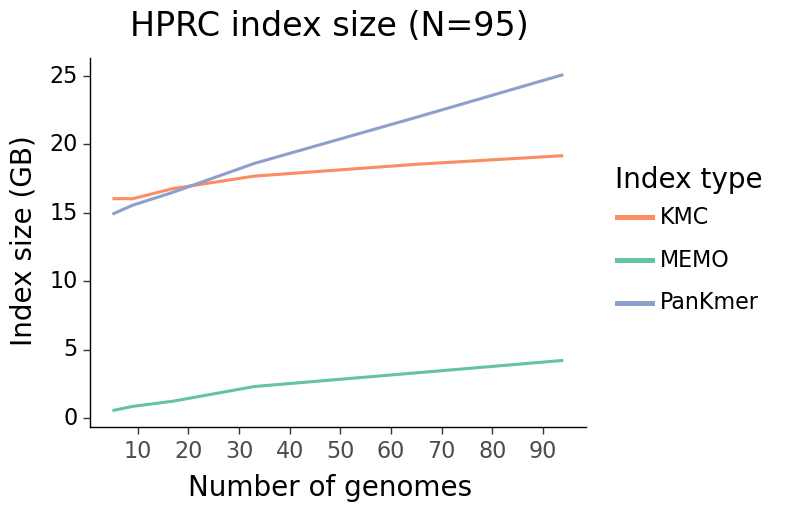

<ggplot: (8738927034965)>

In [20]:
(
    ggplot(HPRC_melt_subset, aes(x='Number Genomes', y='value', color='Index type')) +
    geom_line(size=1.25) +
    ggtitle("HPRC index size (N=95)") +
    xlab("Number of genomes") +
    ylab("Index size (GB)") +
    scale_color_manual(color_dict) +
    scale_x_continuous(breaks=range(0, 100, 10)) +
    theme_tufte_func(base_size=20, rotate=False)
)